<a href="https://colab.research.google.com/github/JoaoMarcosRamos/analisandodadosairbnb/blob/main/C%C3%B3pia_de_%5BTemplate%5D_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Dublin*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Dublin, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [2]:
# importar os pacotes necessarios

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# importar o arquivo listings.csv para um DataFrame

df = pd.read_csv('https://data.insideairbnb.com/ireland/leinster/dublin/2024-09-11/visualisations/listings.csv')




## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

In [4]:
# mostrar as 5 primeiras entradas

df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,44077,cosy comfortable Irish cottage twin,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.29178,-6.25792,Private room,75.0,3,356,2024-09-08,2.17,2,119,43,NaN
1,85156,Cosy Comfortable Irish Cottage 1 Double Bed,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.29209,-6.25624,Private room,72.0,3,316,2024-08-27,1.95,2,33,48,NaN
2,159889,Friendly Single Room,766611,Marie,NaN,Dublin City,53.39027,-6.23547,Private room,55.0,2,444,2024-09-01,2.92,3,348,40,NaN
3,162809,5.5 miles south of Dublin City :^),777681,Robbie,NaN,Dn Laoghaire-Rathdown,53.28326,-6.19188,Private room,85.0,2,389,2024-08-25,3.44,2,7,27,NaN
4,165828,Pádraig Pearse apt. Kilmainham,790601,Timothy,NaN,Dublin City,53.33744,-6.32363,Entire home/apt,197.0,3,76,2023-12-28,0.48,4,185,1,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [5]:
# identificar o volume de dados do DataFrame

print('Registros:',df.shape[0],'\n','Variáveis: ',df.shape[1])

# verificar as 5 primeiras entradas do dataset
df.dtypes


Registros: 6175 
 Variáveis:  18


,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,float64
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,float64


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False).round(2)




,0
license,100.00
neighbourhood_group,100.00
price,15.61
last_review,14.40
reviews_per_month,14.40
host_name,0.00
host_id,0.00
neighbourhood,0.00
latitude,0.00
longitude,0.00


### **Q3. Qual o tipo de distribuição das variáveis?**

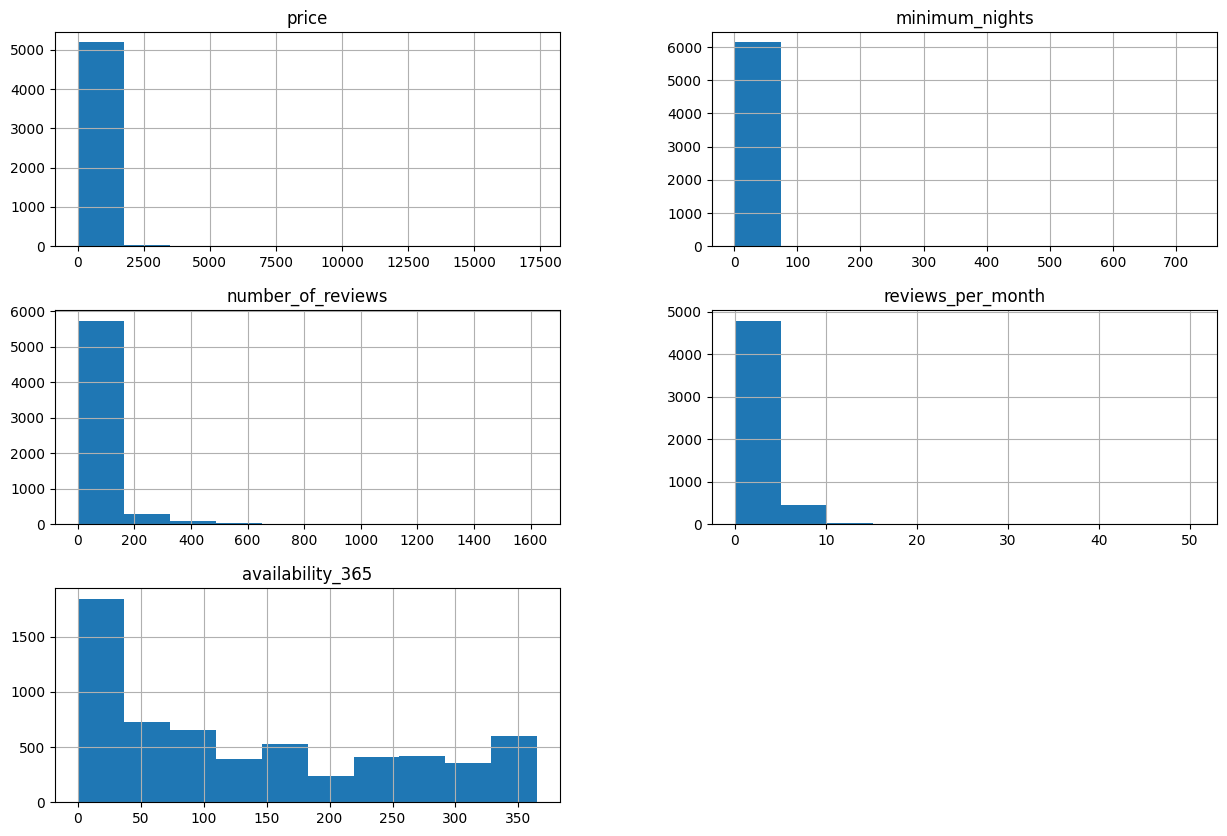

In [45]:
# plotar o histograma das variáveis numéricas

df[['price','minimum_nights','number_of_reviews','reviews_per_month','availability_365']].hist(figsize=(15,10),bins=10)
plt.show()


### **Q4. Qual a média dos preços de aluguel?**

In [47]:
# ver a média da coluna `price``

print('Média de preço é: ',df.price.mean().round(2),'\n')

# ver as estatísticas descritivas de 'price'
df.price.describe().round(1)


Média de preço é:  203.07 



,price
count,5211.0
mean,203.1
std,348.3
min,0.0
25%,90.0
50%,142.0
75%,230.0
max,17400.0


### **Q4. Qual a correlação existente entre as variáveis**

In [12]:
# criar uma matriz de correlação

corr_mtx = df.loc[:,['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].corr()


# mostrar a matriz de correlação
corr_mtx


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.018140,-0.046512,-0.100040,0.094020,0.027519
minimum_nights,0.018140,1.000000,-0.041053,-0.086961,0.061821,0.062031
number_of_reviews,-0.046512,-0.041053,1.000000,0.401225,-0.061210,0.040445
reviews_per_month,-0.100040,-0.086961,0.401225,1.000000,-0.103372,0.025750
calculated_host_listings_count,0.094020,0.061821,-0.061210,-0.103372,1.000000,0.072716
availability_365,0.027519,0.062031,0.040445,0.025750,0.072716,1.000000


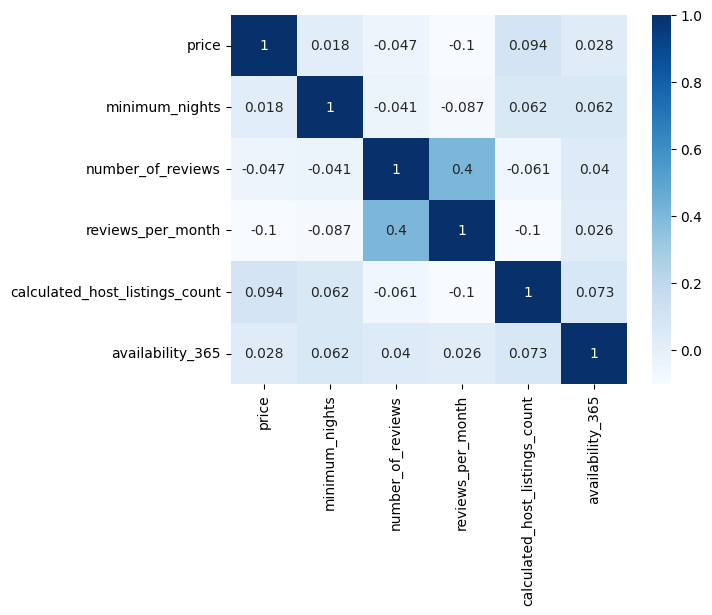

In [13]:
# plotar um heatmap a partir das correlações

sns.heatmap(corr_mtx,annot=True,cmap='Blues')
plt.show()


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [14]:
# mostrar a quantidade de cada tipo de imóvel disponível

df.room_type.value_counts()


,count
room_type,
Entire home/apt,3470
Private room,2569
Shared room,128
Hotel room,8


In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível

df.room_type.value_counts(normalize=True).round(2)


,proportion
room_type,
Entire home/apt,0.56
Private room,0.42
Shared room,0.02
Hotel room,0.00


### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média

df.groupby('neighbourhood').price.mean().sort_values(ascending=False).round(2)



,price
neighbourhood,
Dublin City,211.97
Fingal,203.55
Dn Laoghaire-Rathdown,199.58
South Dublin,125.77


In [29]:
# Demonstrar a estatística descritiva dos preços por bairro.

df.groupby('neighbourhood').price.describe().round(1)


,count,mean,std,min,25%,50%,75%,max
neighbourhood,,,,,,,,
Dn Laoghaire-Rathdown,602.0,199.6,166.5,20.0,88.0,150.5,245.8,1250.0
Dublin City,3541.0,212.0,243.5,0.0,100.0,152.0,245.0,2823.0
Fingal,683.0,203.5,765.1,20.0,75.5,109.0,181.0,17400.0
South Dublin,385.0,125.8,99.0,28.0,63.0,90.0,150.0,700.0


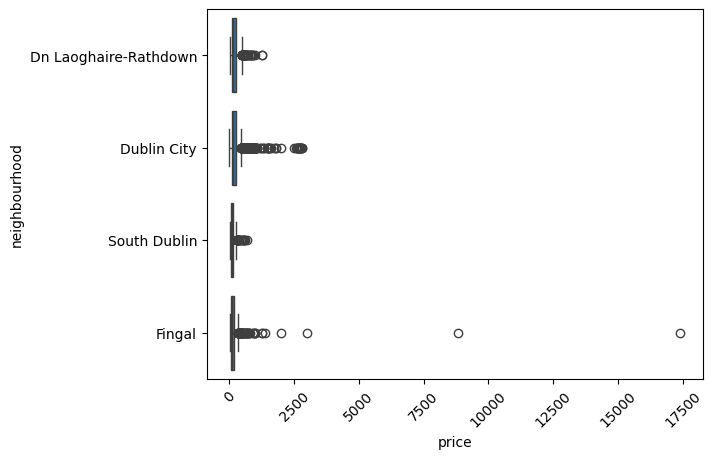

In [32]:
# Demonstrar um boxplot por bairro

sns.boxplot(data=df,y='neighbourhood',x='price')
plt.xticks(rotation=45)
plt.show()



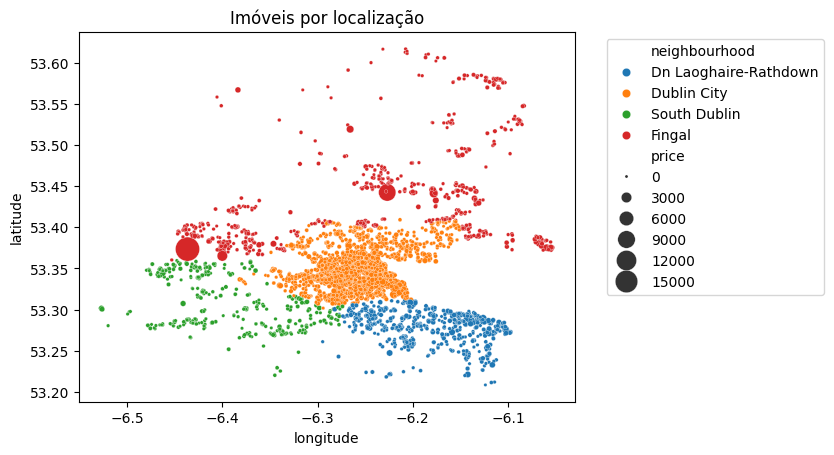

In [23]:
# plotar os imóveis pela latitude-longitude

sns.scatterplot(data=df,x='longitude',y='latitude',hue='neighbourhood',size = 'price',sizes=(5,300),legend=True)
plt.title('Imóveis por localização')
plt.legend(loc='upper left',bbox_to_anchor=(1.05,1))
plt.show()


In [40]:
# Análise dos outliers por bairro

q25 = df.price.quantile(0.25)
q75 = df.price.quantile(0.75)
iqr = q25 - q75

upper = q75*1.5 + iqr
lower = q25*1.5 - iqr

price_outliers = df[df['price']>=upper]

#price_outliers.sort_values('price',ascending=False).head(10)

price_outliers.neighbourhood.value_counts()



,count
neighbourhood,
Dublin City,1153
Dn Laoghaire-Rathdown,183
Fingal,147
South Dublin,63


Analisando Hipótese: Os imóveis mais pertos do centro possuem menor disponibilidade?

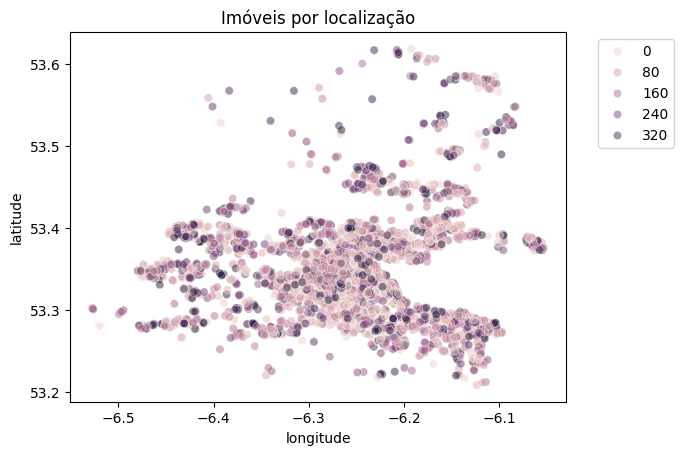

In [64]:
# plotar gráfico
sns.scatterplot(data=df,x='longitude',y='latitude',hue='availability_365',legend=True)
plt.title('Imóveis por localização')
plt.legend(loc='upper left',bbox_to_anchor=(1.05,1))
plt.show()


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [24]:
# ver a média da coluna `minimum_nights``

df.minimum_nights.mean().round(2)


5.45

Qual é a média de listings por host?

In [57]:
# ver a média de listings por host
print('A Média de listing por host é: ',
df[['host_id','calculated_host_listings_count']].drop_duplicates().calculated_host_listings_count.mean().round(2)
)



A Média de listing por host é:  1.61


## Conclusões
